<a href="https://colab.research.google.com/github/bdavis2/CS183/blob/master/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement
You are given a dataset of different `Iris` flower species. The original [dataset](https://archive.ics.uci.edu/ml/datasets/iris) has detailed description of all the characteristics of the flowers. Please feel free to visit the original page to know more about the dataset. Your task is to develop a Neural Network based multi-class classifier using `Keras` to categorize the flowers based on their species. 

**Guide**: Feel free to use `week6-keras-diabetes.ipynb` as a sample to kick-start your implentation. If you simply try to copy and paste the code into your homework, trust me, it won't work!!! 

Here are few things you can try:
* *One hot encoding*: There are three `species` of iris flower in your dataset. This time, you have to classify your data into `three` different categories. For that you need to compute `one hot encoding`.
* *Activation functions*: There are different activation functions used in Neural Network (NN). Your task is to research different activation functions such as SoftMax, ReLu, and Sigmoid, and learn which ones are suitable for which layers of your neural network. Based on that, design your NN architecture and check the performance by computing `accuracy`.
* *Number of hidden layers*: Instead on using one hidden layer, you can try two and check out your results and check the performance by computing `accuracy`.
* *Loss functions*: Keras comes with different  `loss` functions. Your task is to review them and pick any two to report your findings.

**Adaptation**: We have provided you with the original dataset splitting it into two, one for training and the other for testing. You can use `train_nn.csv` to train the parameters of your model and then use `test_nn.csv` to test your model.

**Note**: Please make sure you have proper comments and explanation/justification of the steps you have coded. Please feel to add extra cells to complete all the `TODO` stubs. You are allowed to create your own utility functions to support your code.

In [ ]:
# importing the libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# TODO - feel free to add more as you need!
%matplotlib inline

In [ ]:
from google.colab import files 
files.upload() 

Saving test_NN.csv to test_NN.csv
Saving train_NN.csv to train_NN.csv


{u'test_NN.csv': '1,4.9,3.1,1.5,0.1,Iris-setosa\n2,4.4,3,1.3,0.2,Iris-setosa\n3,5.1,3.4,1.5,0.2,Iris-setosa\n4,5,3.5,1.3,0.3,Iris-setosa\n5,4.5,2.3,1.3,0.3,Iris-setosa\n6,4.4,3.2,1.3,0.2,Iris-setosa\n7,5,3.5,1.6,0.6,Iris-setosa\n8,5.1,3.8,1.9,0.4,Iris-setosa\n9,4.8,3,1.4,0.3,Iris-setosa\n10,5.1,3.8,1.6,0.2,Iris-setosa\n11,4.6,3.2,1.4,0.2,Iris-setosa\n12,5.3,3.7,1.5,0.2,Iris-setosa\n13,5,3.3,1.4,0.2,Iris-setosa\n14,6.3,2.3,4.4,1.3,Iris-versicolor\n15,5.6,3,4.1,1.3,Iris-versicolor\n16,5.5,2.5,4,1.3,Iris-versicolor\n17,5.5,2.6,4.4,1.2,Iris-versicolor\n18,6.1,3,4.6,1.4,Iris-versicolor\n19,5.8,2.6,4,1.2,Iris-versicolor\n20,5,2.3,3.3,1,Iris-versicolor\n21,5.6,2.7,4.2,1.3,Iris-versicolor\n22,5.7,3,4.2,1.2,Iris-versicolor\n23,5.7,2.9,4.2,1.3,Iris-versicolor\n24,6.2,2.9,4.3,1.3,Iris-versicolor\n25,5.1,2.5,3,1.1,Iris-versicolor\n26,5.7,2.8,4.1,1.3,Iris-versicolor\n27,6,3,4.8,1.8,Iris-virginica\n28,6.9,3.1,5.4,2.1,Iris-virginica\n29,6.7,3.1,5.6,2.4,Iris-virginica\n30,6.9,3.1,5.1,2.3,Iris-virginic

In [ ]:
'Loading the train Iris dataset'
# Define headers since the dataset does not have any headers
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
# reading the training data into the data frame
train_df = pd.read_csv('train_NN.csv', header=None, names=col_names)
# reading the test data into the data frame
test_df = pd.read_csv('test_NN.csv', header=None, names=col_names)
test_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.1,1.5,0.1,Iris-setosa
2,4.4,3.0,1.3,0.2,Iris-setosa
3,5.1,3.4,1.5,0.2,Iris-setosa
4,5.0,3.5,1.3,0.3,Iris-setosa
5,4.5,2.3,1.3,0.3,Iris-setosa


In [ ]:
train_df['species'].value_counts()

Iris-virginica     38
Iris-setosa        37
Iris-versicolor    37
Name: species, dtype: int64

In [ ]:
'Perform One Hot Encoding for the classifier to work'
train_label = train_df['species']
label = []
for lab in train_label:
    if lab == 'Iris-setosa':
        label.append([1,0,0])
    elif lab == 'Iris-virginica':
        label.append([0,1,0])
    else: #Iris-setosa
        label.append([0,0,1])
print label
train_df['onehot'] = label


[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0]

In [ ]:
train_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,onehot
1,5.1,3.5,1.4,0.2,Iris-setosa,"[1, 0, 0]"
2,4.9,3.0,1.4,0.2,Iris-setosa,"[1, 0, 0]"
3,4.7,3.2,1.3,0.2,Iris-setosa,"[1, 0, 0]"
4,4.6,3.1,1.5,0.2,Iris-setosa,"[1, 0, 0]"
5,5.0,3.6,1.4,0.2,Iris-setosa,"[1, 0, 0]"


In [ ]:
test_df['species'].value_counts()

Iris-setosa        13
Iris-versicolor    13
Iris-virginica     12
Name: species, dtype: int64

In [ ]:
#create test label
test_label_ = test_df['species']
test_label = []
for lab in test_label_:
    if lab == 'Iris-setosa':
        test_label.append([1,0,0])
    elif lab == 'Iris-virginica':
        test_label.append([0,1,0])
    else: #Iris-setosa
        test_label.append([0,0,1])
print test_label


[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0]]


In [ ]:
'Assigning features and output columns and converting them into numpy arrays'
# this is upto you.
# you can do it in your way
# TODO (optional)

data = np.array(train_df.drop(columns=['species', 'onehot']))
label = np.array(label)

test = np.array(test_df.drop(columns='species'))
test_label = np.array(test_label)

In [ ]:
# Printing the dimensions of your train, and test data
print(data.shape, label.shape)
print(test.shape, test_label.shape)


((112, 4), (112, 3))
((38, 4), (38, 3))


In [ ]:
#'Defining the model'
model = Sequential()
iter = 500
#'Train your model...'
model.add(Dense(25,input_dim=4, activation='tanh'))#input/first hidden layer
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
hist = model.fit(data,label,epochs=iter, batch_size=70, validation_data=(test, test_label))
#'Store the cost (or loss), so that you can use it to plot the graph'
# You might want to check out this: https://keras.io/callbacks/#create-a-callback
print(hist.history.keys())

Train on 112 samples, validate on 38 samples
Epoch 1/500
112/112 [==============================] - 0s 809us/step - loss: 0.3001 - accuracy: 0.0000e+00 - val_loss: 0.2851 - val_accuracy: 0.0000e+00
Epoch 2/500
112/112 [==============================] - 0s 67us/step - loss: 0.2859 - accuracy: 0.0000e+00 - val_loss: 0.2717 - val_accuracy: 0.0000e+00
Epoch 3/500
112/112 [==============================] - 0s 66us/step - loss: 0.2722 - accuracy: 0.0000e+00 - val_loss: 0.2596 - val_accuracy: 0.0263
Epoch 4/500
112/112 [==============================] - 0s 66us/step - loss: 0.2597 - accuracy: 0.0000e+00 - val_loss: 0.2483 - val_accuracy: 0.1053
Epoch 5/500
112/112 [==============================] - 0s 60us/step - loss: 0.2483 - accuracy: 0.1518 - val_loss: 0.2383 - val_accuracy: 0.3158
Epoch 6/500
112/112 [==============================] - 0s 58us/step - loss: 0.2381 - accuracy: 0.3125 - val_loss: 0.2292 - val_accuracy: 0.3421
Epoch 7/500
112/112 [==============================] - 0s 55us/ste

Text(0,0.5,'Loss')

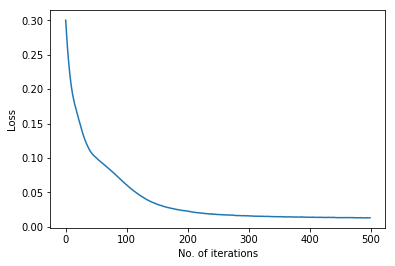

In [ ]:
'Plot loss'
#print hist.history['loss']
plt.plot([i for i in range(iter)], np.array(hist.history['loss']))
plt.xlabel("No. of iterations")
plt.ylabel("Loss")

In [ ]:
'Test the neural network'
# Here you have to find out predicted output for every data from your test dataset
result = model.predict_classes(test)
result.shape
result_species = []
for i in result:
  print i
  if i == 0:
    result_species.append('Iris-setosa')
  elif i == 2:
    result_species.append('Iris-versicolor')
  else:
    result_species.append('Iris-virginica')
print result_species

0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica']


In [ ]:
# You can print your actual y from test and predicted y using test
# you might have to check the dimensions of each to make sure you can compare them later
for i in range(1,38):
  print (test_df['species'][i], result_species[i])
  

('Iris-setosa', 'Iris-setosa')
('Iris-setosa', 'Iris-setosa')
('Iris-setosa', 'Iris-setosa')
('Iris-setosa', 'Iris-setosa')
('Iris-setosa', 'Iris-setosa')
('Iris-setosa', 'Iris-setosa')
('Iris-setosa', 'Iris-setosa')
('Iris-setosa', 'Iris-setosa')
('Iris-setosa', 'Iris-setosa')
('Iris-setosa', 'Iris-setosa')
('Iris-setosa', 'Iris-setosa')
('Iris-setosa', 'Iris-setosa')
('Iris-setosa', 'Iris-versicolor')
('Iris-versicolor', 'Iris-versicolor')
('Iris-versicolor', 'Iris-versicolor')
('Iris-versicolor', 'Iris-versicolor')
('Iris-versicolor', 'Iris-versicolor')
('Iris-versicolor', 'Iris-versicolor')
('Iris-versicolor', 'Iris-versicolor')
('Iris-versicolor', 'Iris-versicolor')
('Iris-versicolor', 'Iris-versicolor')
('Iris-versicolor', 'Iris-versicolor')
('Iris-versicolor', 'Iris-versicolor')
('Iris-versicolor', 'Iris-versicolor')
('Iris-versicolor', 'Iris-versicolor')
('Iris-versicolor', 'Iris-virginica')
('Iris-virginica', 'Iris-virginica')
('Iris-virginica', 'Iris-virginica')
('Iris-virgin

In [ ]:
'Compute accuracy'
# You can use sci-kit learn's accuracy score to evaluate the performance of your model on test data
accuracy_score(test_df['species'], result_species)
#should be ~94% ??

1.0